# Case Study: Customer churn analysis in Fin Tech domain

Problem Statement

 * Customer churn prediction is crucial in FinTech

 *   To build a robust pipeline addrssing data extraction, model development, and system design


Dataset
* Telco Customer Churn data from [Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset?select=Telco_customer_churn.xlsx)



## Hypothesis Building

**Ask:**

State a concise hypothesis connecting features to potential influences on customer churn. If you
are evaluating more than one hypothesis then build separate pipelines for them and showcase
your understanding of pipelines by re-using components.

**Hypothesis:**

1.   **HP1**: Location, services provided, age and gender contribute to customer churm in telco customers





## Data prep


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read data

df = pd.read_excel('/content/Telco_customer_churn.xlsx')
df.shape

(7043, 33)

### Time Feature addition: daily frequency

Note:

* I've selected daily frequency because I assume the time of the day (hour) doesn't matter much in this churn problem as telcos may not be very keen on what time during the day the customer got churned.

* Also, by chosing the daily frequency, the dataset becomes simpler &  easier to handle for a PoC stage

* Assuming start date from 2023-01-01 to genrate the daily time feature

In [ ]:
### Adding time feature - daily frequency

# Assuming start from '2023-01-01'
start_date = pd.Timestamp('2023-01-01')
# Generate a sequence of daily timestamps for the length of the dataframe
df['time_frequency_daily'] = [start_date + pd.Timedelta(days=i) for i in range(len(df))]

print(df[['CustomerID', 'time_frequency_daily']].head())

   CustomerID time_frequency_daily
0  3668-QPYBK           2023-01-01
1  9237-HQITU           2023-01-02
2  9305-CDSKC           2023-01-03
3  7892-POOKP           2023-01-04
4  0280-XJGEX           2023-01-05


In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason', 'time_frequency_daily'],
      dtype='object')

In [ ]:
# Summary of dataset-general statistics
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,time_frequency_daily
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755,2032-08-22 00:00:00
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000,2023-01-01 00:00:00
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000,2027-10-27 12:00:00
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000,2032-08-22 00:00:00
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000,2037-06-17 12:00:00
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000,2042-04-13 00:00:00
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            7043 non-null   object        
 1   Count                 7043 non-null   int64         
 2   Country               7043 non-null   object        
 3   State                 7043 non-null   object        
 4   City                  7043 non-null   object        
 5   Zip Code              7043 non-null   int64         
 6   Lat Long              7043 non-null   object        
 7   Latitude              7043 non-null   float64       
 8   Longitude             7043 non-null   float64       
 9   Gender                7043 non-null   object        
 10  Senior Citizen        7043 non-null   object        
 11  Partner               7043 non-null   object        
 12  Dependents            7043 non-null   object        
 13  Tenure Months     

## Standard EDA

### Data Quality Checks

In [ ]:
#TODO: Create a Covariance matrix

### Covariance and Correlation Matrices

In [ ]:
#TODO: Create a Correlation matrix

### Missing values analysis

- Except the `Churn Reason` column, which is an optional text column that customers may have or may not have filled, no missing values have been found in the provided Kaggle dataset.

In [ ]:
# Check for missing values
print(df.isnull().sum())

CustomerID                 0
Count                      0
Country                    0
State                      0
City                       0
Zip Code                   0
Lat Long                   0
Latitude                   0
Longitude                  0
Gender                     0
Senior Citizen             0
Partner                    0
Dependents                 0
Tenure Months              0
Phone Service              0
Multiple Lines             0
Internet Service           0
Online Security            0
Online Backup              0
Device Protection          0
Tech Support               0
Streaming TV               0
Streaming Movies           0
Contract                   0
Paperless Billing          0
Payment Method             0
Monthly Charges            0
Total Charges              0
Churn Label                0
Churn Value                0
Churn Score                0
CLTV                       0
Churn Reason            5174
time_frequency_daily       0
dtype: int64


## Feature Engineering and Reduction

**Ask:**
*italicized text*
Max 6 raw/derived features, use suitable techniques.

### **Data Cleaning Steps**

*   Data type of `Total Charges` column was `object`, we need to convert to `numeric` type(float).



In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [ ]:
# Confirm the conversion by checking the data type again
print(df['Total Charges'].dtype)

float64


In [ ]:
# Dividing the number of missing values by the total number of rows gives the proportion of missing values
df1 = (df.isnull().sum() / len(df))

# Filter out columns with no missing values
# drop(df1[df1 == 0].index) removes columns with zero missing values
# sort_values(ascending=False) sorts the remaining columns by the proportion of missing values in descending order
df1 = df1.drop(df1[df1 == 0].index).sort_values(ascending=False)

# Calculate the number of missing values for each column
missing_counts = df[df1.index].isna().sum()
# Create a DataFrame to display the results
missing_data = pd.DataFrame({'mean of nulls': df1, 'number of nulls': missing_counts})
print(missing_data)

               mean of nulls  number of nulls
Churn Reason        0.734630             5174
Total Charges       0.001562               11


**The reason of nulls and how to handle them?**


**Churn Reason column**

About 73%(5174) of Churn Reason column is missing data, But why?

In [ ]:
df['Churn Label'].value_counts(normalize=True)

Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

73.46% of the customers did not churn (remained with the company), whereas 26.54% of the customers churned (left the company).

73% of customers have a Churn Label = No, so they don't have to list a Churn Reason.

In [ ]:
# Filter the DataFrame to show only the rows where 'Total Charges' is NaN
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,time_frequency_daily
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN,2029-02-12
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,No,Mailed check,20.25,NaN,No,0,68,5504,NaN,2029-09-04
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,No,Mailed check,80.85,NaN,No,0,45,2048,NaN,2030-01-12
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,No,Mailed check,25.75,NaN,No,0,48,4950,NaN,2030-04-21
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN,2030-10-27
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,No,Mailed check,19.85,NaN,No,0,53,2019,NaN,2034-11-10
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,No,Mailed check,25.35,NaN,No,0,49,2299,NaN,2035-11-01
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,No,Mailed check,20.00,NaN,No,0,27,3763,NaN,2036-12-22
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN,2038-08-29
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,No,Mailed check,73.35,NaN,No,0,44,2342,NaN,2041-07-17


Calculating charges:

In [ ]:
df['calc_charges'] = df['Monthly Charges'] * df['Tenure Months']

calculating difference between Total Charges and calculated charges

In [ ]:
df['diff_in_charges'] = df['Total Charges'] - df['calc_charges']

Checking if it works

In [ ]:
fig = px.histogram(df, x="diff_in_charges",color = 'Contract',marginal="box")
fig.show()

Distribution of the difference between the actual total chargers of our customers and the values that we calculated by multiplying the monthly chargers and the number of months that the customer used the service. The median difference is up to 1$ for all contract types (which means that for 50 percent of our customers, charges calculated by multiplying monthly charges by the number of months in the service are equal to the total charges that are presented in the dataset).

**Quantiles:**

In [ ]:
df.groupby('Contract')[['Total Charges','diff_in_charges']].quantile([.50,.80,.90,.95])

Total Charges  diff_in_charges
Contract                                           
Month-to-month 0.50       679.5500           0.0000
               0.80      2485.7300          24.8100
               0.90      3844.0600          54.0200
               0.95      4966.9200          85.3300
One year       0.50      2657.5500           0.7750
               0.80      5286.4600          55.0500
               0.90      6341.2500          92.2000
               0.95      7072.4725         133.3375
Two year       0.50      3623.9500           0.5000
               0.80      6399.2400          61.5300
               0.90      7457.6100          97.5700
               0.95      7922.3400         139.1800

95% of customers the difference is less than 10% of the median total charges. In this case, it seems possible to replace the missing values of total charges with those calculated in terms of monthly charges and not delete these rows.

In [ ]:
df['Total Charges'] = np.where(df['Total Charges'].isna() == True,df['calc_charges'], df['Total Charges'])

In [ ]:
df = df.drop(['calc_charges','diff_in_charges'], axis=1)

**Word Cloud on Churn Reason Column**

Screenshot of a word cloud from `Churn Reason` column:

This gives insights into why customers churned & their reasoning.

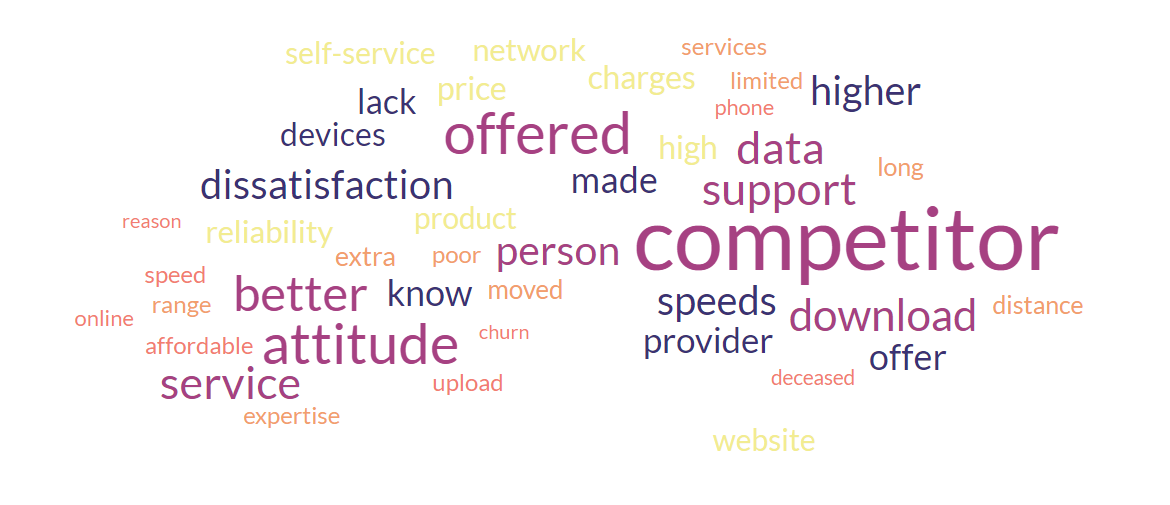

In [ ]:
# Impute missing values in "Churn Reason" with "Not Applicable"
df['Churn Reason'].fillna('Not Applicable', inplace=True)

# analyze churn reasons for all customers:
churn_reasons = df['Churn Reason'].value_counts()

print("Churn Reasons for All Customers:")
print(churn_reasons)

Churn Reasons for All Customers:
Churn Reason
Not Applicable                               5174
Attitude of support person                    192
Competitor offered higher download speeds     189
Competitor offered more data                  162
Don't know                                    154
Competitor made better offer                  140
Attitude of service provider                  135
Competitor had better devices                 130
Network reliability                           103
Product dissatisfaction                       102
Price too high                                 98
Service dissatisfaction                        89
Lack of self-service on Website                88
Extra data charges                             57
Moved                                          53
Lack of affordable download/upload speed       44
Long distance charges                          44
Limited range of services                      44
Poor expertise of phone support                20
Poor

#### Percentage of customers churned


In [ ]:
# Plot Percentage of customers churned
fig = px.pie(df.groupby('Churn Label')['CustomerID'].nunique().reset_index(),
             values='CustomerID',
             names='Churn Label')
fig.show()

#### Customer's lifetime in the service (Tenure)

In [ ]:
fig = px.histogram(df, x="Tenure Months", color="Churn Label",marginal="box" )
fig.show()

**Histogram:**

  You'll see separate bars for churned and non-churned customers, showing the distribution of tenure months within each group.

**Box Plots:**
*   Overlaid on the histogram, you'll see two box plots, one for churned and one for non-churned customers. These box plots will visually represent:
*   The median tenure month (the line in the middle of the box).
*   The interquartile range (IQR) - the box represents the middle 50% of the data points.
*   The whiskers extending from the box indicate the range of the remaining data points (up to 1.5 IQR from the quartiles).

**Senior Citizen or not**

In [ ]:
fig = px.pie(df.groupby(['Senior Citizen','Churn Label'])['CustomerID'].count().reset_index(),
            values='CustomerID',
            names='Churn Label',
            facet_col = 'Senior Citizen',
            color = 'Churn Label',
            title = 'Churn rate by customer age')

fig.show()

The churn rate among senior citizens is almost twice as high as among non-senior citizens. However, there are also much fewer such customers.

In [ ]:
df.groupby('Senior Citizen')['CustomerID'].count()

Senior Citizen
No     5901
Yes    1142
Name: CustomerID, dtype: int64

In [ ]:
fig = px.bar(df.groupby(['Senior Citizen','Internet Service','Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             barmode="group",
             facet_col = 'Senior Citizen'
            )
fig.show()

Among senior citizens, a larger percentage was connected to the optical fiber Internet, and for these customers we see the highest churn rate.

Let's summarize everything we learned after analyzing the data:

*   the lowest churn rate among customers without Internet services (but there are fewer such customers)
*   69.2% of the clients in the churn were connected to the fiber optic Internet
*   the absence of connected technical support and online security options correlates with the churn variable
*   if we look at the context of customers' payment methods, the highest churn rate is for customers with an electronic check, regardless of the type of Internet services
*   the  сhurn rate for senior citizens is almost twice as high as for non-senior citizens


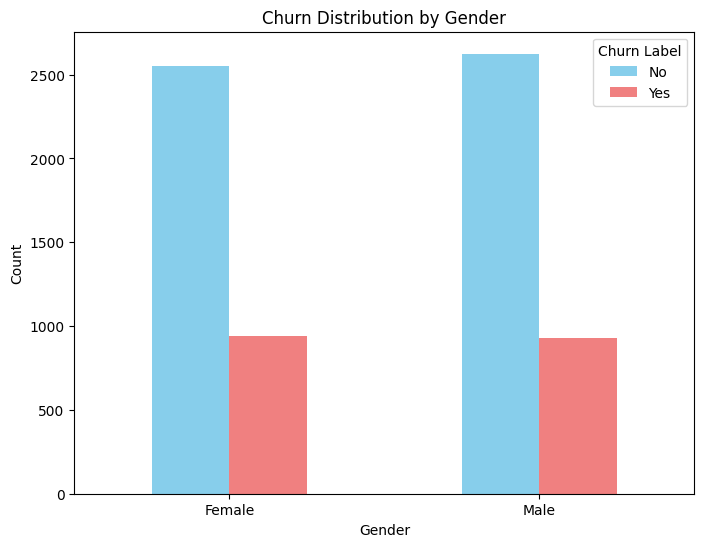

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of churn (Yes) for each gender
churn_counts = df.groupby('Gender')['Churn Label'].value_counts()
churn_counts

# Unstack to create a DataFrame (optional, but useful for customization)
churn_rates = churn_counts.unstack(fill_value=0)  # Fill missing values with 0

# Plot the bar chart
churn_rates.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.xlabel('Gender')
plt.ylabel('Count')  # Use 'Count' instead of 'Churn Rate' for clarity
plt.title('Churn Distribution by Gender')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Churn Label')  # Add legend

# Show the plot
plt.show()


By comparing the heights of the bars, you can determine that Female group has a higher churn rate(939).

Senior Citizen  Churn Label
No              No             4508
                Yes            1393
Yes             No              666
                Yes             476
Name: count, dtype: int64


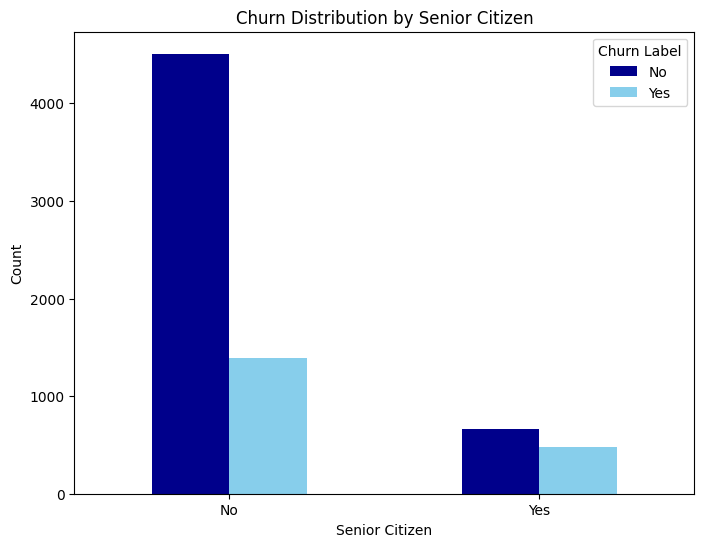

In [ ]:
# Count churn occurrences for each Senior Citizen category
churn_count = df.groupby('Senior Citizen')['Churn Label'].value_counts()
print(churn_count)

# Unstack to create a DataFrame (optional, but useful for customization)
churn_rates = churn_count.unstack(fill_value=0)  # Fill missing values with 0

# Plot the side-by-side bar chart
churn_rates.plot(kind='bar', color=['darkblue', 'skyblue'], figsize=(8, 6))
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Churn Distribution by Senior Citizen')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Churn Label')  # Add legend

# Show the plot
plt.show()


Non-Senior Citizen group has a higher churn rate(1393).

Dependents  Churn Label
No          No             3653
            Yes            1763
Yes         No             1521
            Yes             106
Name: count, dtype: int64


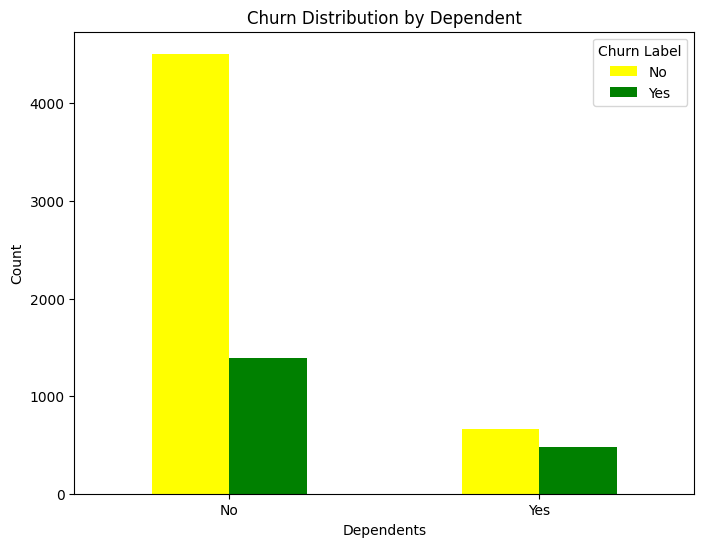

In [ ]:
churn_countss = df.groupby('Dependents')['Churn Label'].value_counts()
print(churn_countss)

# Unstack to create a DataFrame (optional, but useful for customization)
churn_rates = churn_count.unstack(fill_value=0)  # Fill missing values with 0

# Plot the side-by-side bar chart
churn_rates.plot(kind='bar', color=['yellow', 'green'], figsize=(8, 6))
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Churn Distribution by Dependent')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Churn Label')  # Add legend
plt.show()

Customers with No Dependents: The churn rate is (1763 / (3653 + 1763)) * 100% = 48.29%.

Customers with Yes Dependents: The churn rate is (106 / (1521 + 106)) * 100% = 6.97%.

Customers with No Dependents churn at a significantly higher rate (over 7 times higher) compared to customers with Yes Dependents. This suggests that having dependents might be a factor that influences customer retention.

Deleting the columns

In [ ]:
df = df.drop(['Country','State','Count','Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long',
                  'Latitude','Longitude'], axis = 1)

Changing categorical variables to numeric

In [ ]:
df['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: encode_data(x))
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,time_frequency_daily
0,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,2023-01-01
1,0,0,0,1,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,2023-01-02
2,0,0,0,1,8,1,2,1,0,0,...,0,2,2,0,1,2,99.65,820.50,1,2023-01-03
3,0,0,1,1,28,1,2,1,0,0,...,2,2,2,0,1,2,104.80,3046.05,1,2023-01-04
4,1,0,0,1,49,1,2,1,0,2,...,0,2,2,0,1,0,103.70,5036.30,1,2023-01-05


In [ ]:
# Covariance Matrix
"""covariance_matrix = df.cov()
plt.figure(figsize=(20, 10))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Covariance Matrix")
plt.show()"""

'covariance_matrix = df.cov()\nplt.figure(figsize=(20, 10))\nsns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)\nplt.title("Covariance Matrix")\nplt.show()'

*   If COV(xi, xj) = 0 then variables are uncorrelated
*   If COV(xi, xj) > 0 then variables positively correlated
*   If COV(xi, xj) < 0 then variables negatively correlated

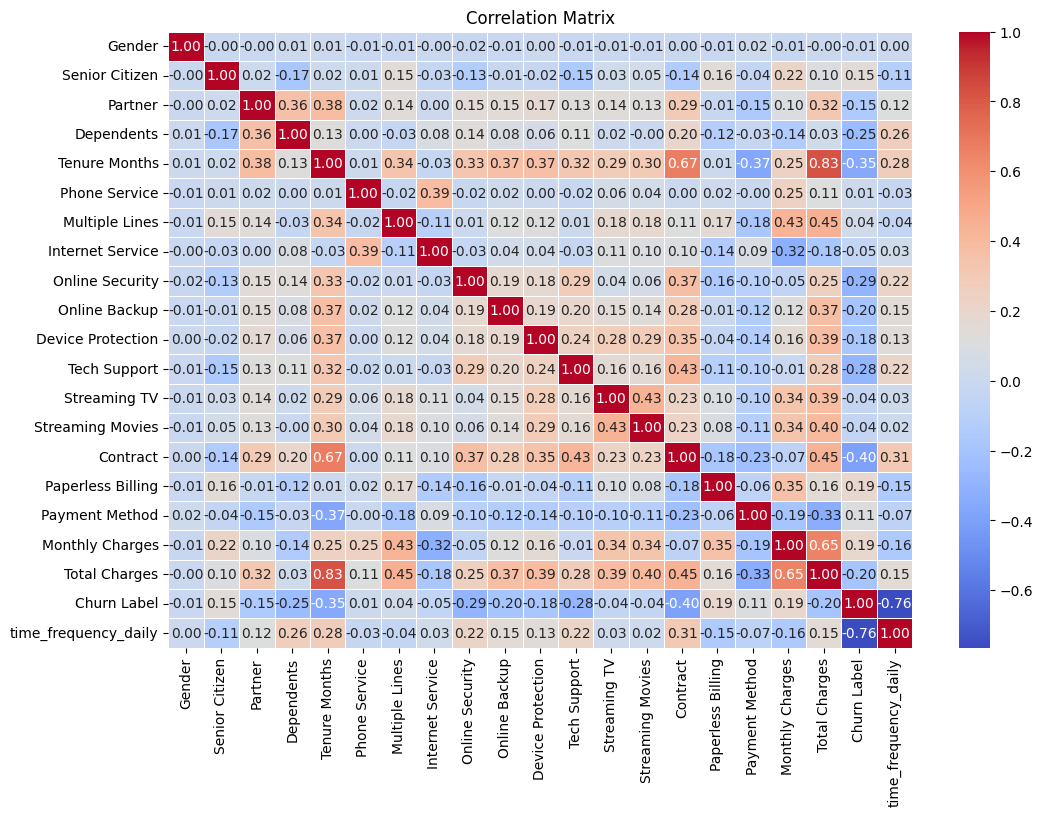

In [ ]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

*   If r = -1, it means that there is a perfect negative correlation.
*   If r = 0, it means that there is no correlation between the two variables.
*   If r = 1, it means that there is a perfect positive correlation.



Insights:
*   Tenure Month and Contract
*   Tenure Month and Total Charges
*   Monthly Charges and Total Charges
*   Multiple Lines and Total Charges
*   Multiple Lines and Monthly Charges
*   Streaming Movies and Total Charges

**Correlation of all selected features with churn label:**

In [ ]:
fig = px.bar(df.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()

In [ ]:
df = df.drop(['Gender','Senior Citizen','Partner','Dependents','Phone Service','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV',
                  'Paperless Billing','Payment Method'], axis = 1)

**Balancing data**

our data is unbalanced and we have more data about customers who are not in churn.

In [ ]:
from imblearn.over_sampling import SMOTE
df.groupby('Churn Label')['Churn Label'].count()   #1 = the customer left the company this quarter. 0 = the customer remained with the company.

Churn Label
0    5174
1    1869
Name: Churn Label, dtype: int64

Unbalanced data is not good for binary classification because it can lead to biased model performance and inaccurate predictions. If the data is unbalanced, a classifier that always predicts the majority class can achieve a high accuracy rate, but such a model may not be useful

SMOTE is a algorithmic technique for oversampling the minority class in an imbalanced dataset for binary classification.

In [ ]:
over = SMOTE(sampling_strategy = 1)

x = df.drop(["Churn Label", "time_frequency_daily"], axis=1).values
y = df['Churn Label'].values

In [ ]:
x,y = over.fit_resample(x,y)

## **Build a model**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =2, test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create the models
model_1 = LogisticRegression()
model_2 = RandomForestClassifier()

# Train the models
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_1 = model_1.predict(x_test)
y_pred_2 = model_2.predict(x_test)

# Calculate accuracy for both models
accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print("Logistic Regression Accuracy:", accuracy_1)
print("Random Forest Accuracy:", accuracy_2)

# Precision:
precision_1 = precision_score(y_test, y_pred_1, average='weighted')  # Weighted average for imbalanced classes (optional)
precision_2 = precision_score(y_test, y_pred_2, average='weighted')

print("Logistic Regression Precision:", precision_1)
print("Random Forest Precision:", precision_2)

# Recall:
recall_1 = recall_score(y_test, y_pred_1, average='weighted')  # Weighted average for imbalanced classes (optional)
recall_2 = recall_score(y_test, y_pred_2, average='weighted')

print("Logistic Regression Recall:", recall_1)
print("Random Forest Recall:", recall_2)

# F1-score:
f1_1 = f1_score(y_test, y_pred_1, average='weighted')  # Weighted average for imbalanced classes (optional)
f1_2 = f1_score(y_test, y_pred_2, average='weighted')

print("Logistic Regression F1-score:", f1_1)
print("Random Forest F1-score:", f1_2)

# Confusion Matrix:
confusion_matrix_1 = confusion_matrix(y_test, y_pred_1)
confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)

print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix_1)
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix_2)

# Classification Report:
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_1))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_2))

Logistic Regression Accuracy: 0.7531400966183575
Random Forest Accuracy: 0.8429951690821256
Logistic Regression Precision: 0.7663793808589531
Random Forest Precision: 0.8430252231878141
Logistic Regression Recall: 0.7531400966183575
Random Forest Recall: 0.8429951690821256
Logistic Regression F1-score: 0.7505631228282547
Random Forest F1-score: 0.8430005559256326

Logistic Regression Confusion Matrix:
 [[681 368]
 [143 878]]

Random Forest Confusion Matrix:
 [[883 166]
 [159 862]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73      1049
           1       0.70      0.86      0.77      1021

    accuracy                           0.75      2070
   macro avg       0.77      0.75      0.75      2070
weighted avg       0.77      0.75      0.75      2070


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84     

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}

# Create a GridSearchCV object to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best model based on the grid search
best_model_2 = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred_best_2 = best_model_2.predict(x_test)
accuracy_best_2 = accuracy_score(y_test, y_pred_best_2)

print("Random Forest Accuracy (Tuned Hyperparameters):", accuracy_best_2)

Random Forest Accuracy (Tuned Hyperparameters): 0.8173913043478261


## Conclusion

1. Using Random Forest model, an accuracy of 84% was achieved.
2. This can be improved by finetuning parameters in the future.